<a href="https://colab.research.google.com/github/hazmicokro/Data-Literate-Bootcamp-2020/blob/main/weekly_task_6_M_Hazmi_Cokro_Mandiri_Decision%20Trees%20(DT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**M Hazmi Cokro M / @hazmicokro / Week 6 / Decission Tree**


# Decision Trees Project 

Untuk proyek ini kita akan menggunakan data yang disediakan publik dari [LendingClub.com](www.lendingclub.com). Lending Club menghubungkan orang yang butuh uang (Peminjam) dengan orang yang memiliki uang (investors). Diharapkan sebagai investor anda dapat berinvestasi pada orang yang profilnya memiliki kemungkinan besar untuk mengembalikan uang anda. kita akan mencoba membuat model untuk memporediksi hal ini.

Kita akan menggunakan data pinjaman dari 2007-2010 dan mencoba untuk mengklasifikasikan dan memprediksi apakah peminjam membayar kembali pinjaman mereka secara penuh atau tidak. Anda bisa mendownload datanya dari [sini] (https://www.lendingclub.com/info/download-data.action) atau cukup gunakan csv yang sudah disediakan. Anda disarankan menggunakan csv yang disediakan karena telah dibersihkan dari nilai NA.

Attribut:
* credit.policy: 1 jika pelanggan memenuhi kriteria penjaminan kredit LendingClub.com, dan 0 sebaliknya.
* purpose: Tujuan pinjaman (mengambil nilai "credit_card", "debt_consolidation", "education", "major_purchase", "small_business", dan "all_other").
* int.rate: Suku bunga pinjaman, sebagai proporsi (tingkat 11% akan disimpan sebagai 0,11). Peminjam yang dinilai oleh LendingClub.com lebih berisiko diberi suku bunga yang lebih tinggi.
* installment: Angsuran bulanan yang harus dibayar oleh peminjam jika pinjaman tersebut didanai.
* log.annual.inc: Catatan alami dari pendapatan tahunan yang dilaporkan sendiri oleh peminjam.
* dti: Rasio hutang terhadap pendapatan peminjam (jumlah hutang dibagi pendapatan tahunan).
* fico: Nilai kredit FICO peminjam.
* days.with.cr.line: Jumlah hari peminjam memiliki batas kredit.
* revol.bal: Saldo bergulir peminjam (jumlah yang belum dibayar di akhir siklus penagihan kartu kredit).
* revol.util: Tingkat pemanfaatan baris bergulir peminjam (jumlah batas kredit yang digunakan relatif terhadap total kredit yang tersedia).
* inq.last.6mths: Jumlah pertanyaan peminjam oleh kreditur dalam 6 bulan terakhir.
* delinq.2 thn: Berapa kali peminjam telah melewati 30+ hari jatuh tempo pembayaran dalam 2 tahun terakhir.
* pub.rec: Jumlah catatan publik yang merendahkan (pengajuan kebangkrutan, hak gadai pajak, atau keputusan) peminjam.

# Import Libraries

**Import library untuk pandas dan library visualisasi (matplotlib, seaborn)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/weekly_task_5_M Hazmi Cokro Mandiri'

/content/drive/MyDrive/weekly_task_5_M Hazmi Cokro Mandiri


## Get the Data

**Gunakan pandas untuk membaca loan_data.csv sebagai dataframe dengan nama loans.**

In [ ]:
loans = pd.read_csv("/content/drive/MyDrive/weekly_task_5_M Hazmi Cokro Mandiri/[1] loan_data.csv")
loans.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


**Cek info(), head(), dan describe() pada loans.**

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

visualisasi data. Kita akan menggunakan seaborn dan pandas, namun juga bebas untuk memilih library apapun yang ingin anda gunakan. jangan khawatir terhadap pencocokan warna, khawatirlah tentang menyampaikan ide utama dalam visualisasi.

**Buat histogram dari dua distribusi FICO di atas satu sama lain, satu untuk setiap hasil credit.policy**

*Catatan: this is pretty tricky, feel free to ask. Anda mungkin memerlukan satu baris kode untuk setiap histogram, saya juga merekomendasikan hanya menggunakan visualisasi bawaan pandas .hist ()*

Text(0.5, 0, 'FICO')

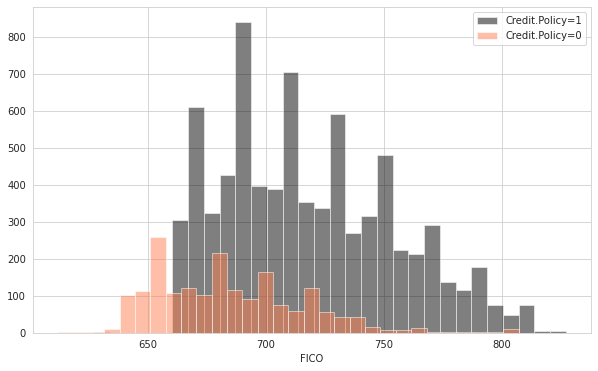

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='k',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='coral',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**Kemudian buat visualisasi yang sama, namun kali ini dengan menggunakan kolom not.fully.paid.**

Text(0.5, 0, 'FICO')

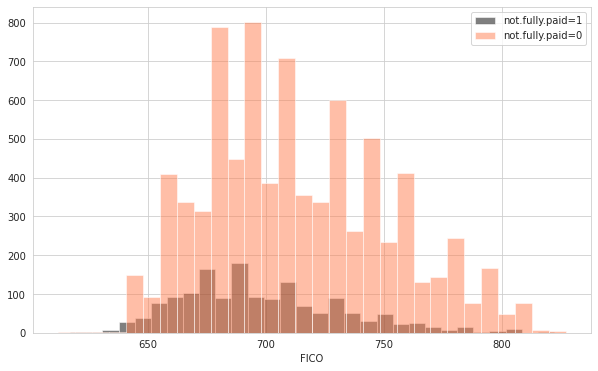

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='k',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='coral',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**Buat countplot menggunakan seaborn yang menunjukkan jumlah dari loans berdasarkan purpose, dengan hue menggunakan not.fully.paid**

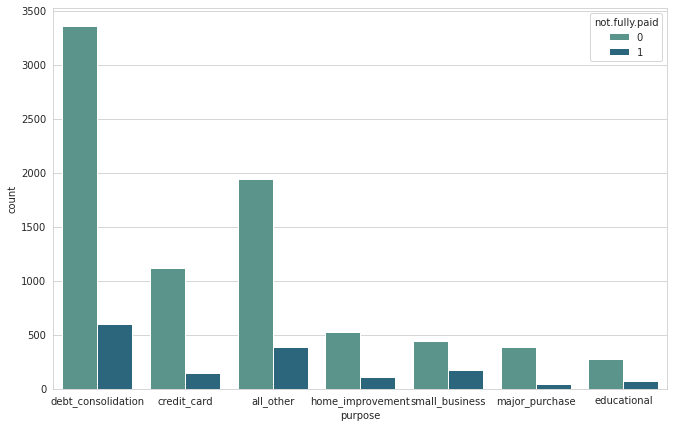

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='crest')

**Mari kita lihat tren antara skor FICO dan int_rate dengan menggunakan jointplot**

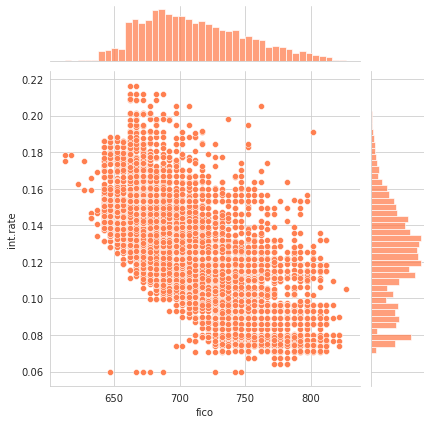

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='coral')

**Buat lmplots berikut untuk melihat apakah trennya berbeda antara not.fully.paid dan credit.policy. Lihat dokumentasi lmplot () jika Anda tidak tahu cara memisahkannya ke dalam kolom**

<Figure size 792x504 with 0 Axes>

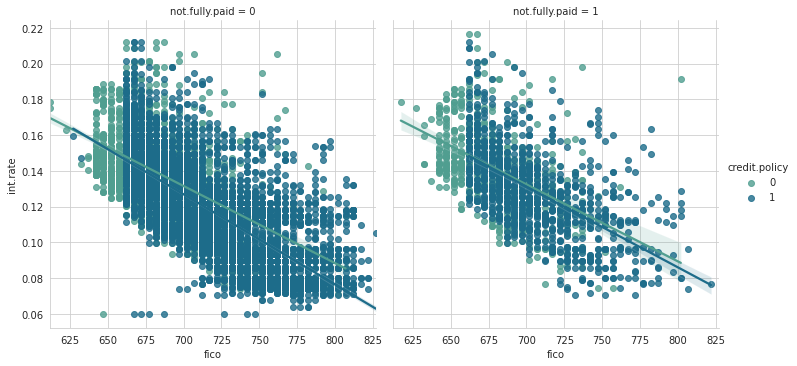

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='crest')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Cek loans.info() kembali.**

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Perhatikan bahwa kolom **purpose** adalah kategorikal

Itu berarti kita perlu mengubahnya menggunakan variabel dummy sehingga sklearn dapat memahaminya. Mari lakukan ini dalam satu langkah bersih menggunakan pd.get_dummies.

langkah pertama yg harus dilakukan adalah

**Buat list 1 elemen yang berisi string 'purpose'. beri nama list ini cat_feats.**

In [ ]:
cat_feats = ["purpose"]

**sekarang gunakan pd.get_dummies(loans,columns=cat_feats,drop_first=True) untuk membuat dataFrame yang lebih besar yang memiliki kolom fitur baru dengan variabel dummy. Tetapkan kerangka data ini sebagai final_data.**

In [ ]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Now its time to split our data into a training set and a testing set!

**Gunakan sklearn untuk membagi data menjadi data training dan data uji**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop("not.fully.paid", axis=1)
y = final_data["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Buat instance DecisionTreeClassifier () yang bernama dtree dan fit kan dengan data pelatihan.**

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Buat prediksi dari data test dan buat juga classification report dan confusion matrix**

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1617
           1       0.22      0.25      0.23       299

    accuracy                           0.75      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.76      0.75      0.75      1916



In [ ]:
print(confusion_matrix(y_test, predictions))

[[1354  263]
 [ 225   74]]
